# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  Discombobulated Incompacitators(Team 3)

Created by: Nathan M(015519257), Jiaying L (016057756), Aye Nyein Kyaw (018005065), Hetav Vyas (SJSU IDs)  

Last updated: 9/28/25

Briefly describe your dataset: Dataset consists of many different identifiers but was selected so that we could analyze the funding that hospitals receive. This dataset specifically focuses on California and provides a majority numbers from Medicare, etc.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
import pandas as pd
import json
import urllib

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

"""
url = 'https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=6e956cf6-5ced-4f4d-9cfd-0eb709b02cc3&limit=5&q=title:jones'
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
print(response_dict)
"""

"\nurl = 'https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=6e956cf6-5ced-4f4d-9cfd-0eb709b02cc3&limit=5&q=title:jones'\nfileobj = urllib.request.urlopen(url)\nresponse_dict = json.loads(fileobj.read())\nprint(response_dict)\n"

In [ ]:
# import df from urls
# for 2022, 2023
url = 'https://raw.githubusercontent.com/CS133-DataVisualization/term-project-discombobulated-incompacitators-team-3/refs/heads/main/Project%20Assignments/data/2022-23%20financial%20and%20utilization%20report.csv'
report = pd.read_csv(url)
report.head()

,index,FAC_NO,FAC_NAME,YEAR_QTR,BEG_DATE,END_DATE,OP_STATUS,COUNTY_NAME,HSA,HFPA,...,TOT_OUT_VIS_CC,GROS_INPAT_REV_CC,GROS_OUTPAT_REV_CC,CONTR_ADJ_CC,OTHR_DEDUCT_CC,CAP_PREM_REV_CC,NET_PAT_REV_CC,QA_FEES,QA_SUPPL_PAY,MNGD_CARE_QA_PAY
0,1,106580996,ADVENTIST HEALTH AND RIDEOUT,20234,10/01/2023,12/31/2023,Open,Yuba,02 - Golden Empire,227,...,0,0,0,0,0,0,0,0,0,0
1,2,106150788,ADVENTIST HEALTH BAKERSFIELD,20234,10/01/2023,12/31/2023,Open,Kern,09 - Central,617,...,0,0,0,0,0,0,0,0,0,0
2,3,106171049,ADVENTIST HEALTH CLEARLAKE,20234,10/01/2023,12/31/2023,Open,Lake,01 - Northern California,115,...,0,0,0,0,0,0,0,0,0,0
3,4,106150706,ADVENTIST HEALTH DELANO,20234,10/01/2023,12/31/2023,Open,Kern,09 - Central,617,...,0,0,0,0,0,0,0,0,0,0
4,5,106190323,ADVENTIST HEALTH GLENDALE,20234,10/01/2023,12/31/2023,Open,Los Angeles,11 - Los Angeles,909,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
report.tail()

,index,FAC_NO,FAC_NAME,YEAR_QTR,BEG_DATE,END_DATE,OP_STATUS,COUNTY_NAME,HSA,HFPA,...,TOT_OUT_VIS_CC,GROS_INPAT_REV_CC,GROS_OUTPAT_REV_CC,CONTR_ADJ_CC,OTHR_DEDUCT_CC,CAP_PREM_REV_CC,NET_PAT_REV_CC,QA_FEES,QA_SUPPL_PAY,MNGD_CARE_QA_PAY
3501,434,106190857,WEST COVINA MEDICAL CENTER,20221,2022-01-01 0:00:00,2022-03-31 0:00:00,Open,Los Angeles,11 - Los Angeles,915,...,0,0,0,0,0,0,0,0,0,0
3502,435,106190859,WEST HILLS HOSPITAL AND MEDICAL CENTER,20221,2022-01-01 0:00:00,2022-03-31 0:00:00,Open,Los Angeles,11 - Los Angeles,905,...,0,0,0,0,0,0,0,0,0,0
3503,436,106190883,WHITTIER HOSPITAL MEDICAL CENTER,20221,2022-01-01 0:00:00,2022-03-31 0:00:00,Open,Los Angeles,11 - Los Angeles,919,...,0,0,0,0,0,0,0,0,0,0
3504,437,106571086,WOODLAND MEMORIAL HOSPITAL,20221,2022-01-01 0:00:00,2022-03-31 0:00:00,Open,Yolo,02 - Golden Empire,313,...,0,0,0,0,0,0,0,0,0,0
3505,438,106380939,ZUCKERBERG SAN FRANCISCO GENERAL HOSPITAL & TR...,20221,2022-01-01 0:00:00,2022-03-31 0:00:00,Open,San Francisco,04 - West Bay,423,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop index column it came with
report = report.drop(columns="index")
report.head()

,FAC_NO,FAC_NAME,YEAR_QTR,BEG_DATE,END_DATE,OP_STATUS,COUNTY_NAME,HSA,HFPA,TYPE_CNTRL,...,TOT_OUT_VIS_CC,GROS_INPAT_REV_CC,GROS_OUTPAT_REV_CC,CONTR_ADJ_CC,OTHR_DEDUCT_CC,CAP_PREM_REV_CC,NET_PAT_REV_CC,QA_FEES,QA_SUPPL_PAY,MNGD_CARE_QA_PAY
0,106580996,ADVENTIST HEALTH AND RIDEOUT,20234,10/01/2023,12/31/2023,Open,Yuba,02 - Golden Empire,227,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
1,106150788,ADVENTIST HEALTH BAKERSFIELD,20234,10/01/2023,12/31/2023,Open,Kern,09 - Central,617,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
2,106171049,ADVENTIST HEALTH CLEARLAKE,20234,10/01/2023,12/31/2023,Open,Lake,01 - Northern California,115,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
3,106150706,ADVENTIST HEALTH DELANO,20234,10/01/2023,12/31/2023,Open,Kern,09 - Central,617,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
4,106190323,ADVENTIST HEALTH GLENDALE,20234,10/01/2023,12/31/2023,Open,Los Angeles,11 - Los Angeles,909,Church,...,0,0,0,0,0,0,0,0,0,0


### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
#.info() and
report.info()
print('----------\n\033[1mMissing Values:\033[0m')
print(report.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Columns: 133 entries, FAC_NO to MNGD_CARE_QA_PAY
dtypes: int64(119), object(14)
memory usage: 3.6+ MB
----------
Missing Values:
FAC_NO              0
FAC_NAME            0
YEAR_QTR            0
BEG_DATE            0
END_DATE            0
                   ..
CAP_PREM_REV_CC     0
NET_PAT_REV_CC      0
QA_FEES             0
QA_SUPPL_PAY        0
MNGD_CARE_QA_PAY    0
Length: 133, dtype: int64


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
report.dtypes

,0
FAC_NO,int64
FAC_NAME,object
YEAR_QTR,int64
BEG_DATE,object
END_DATE,object
...,...
CAP_PREM_REV_CC,int64
NET_PAT_REV_CC,int64
QA_FEES,int64
QA_SUPPL_PAY,int64


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

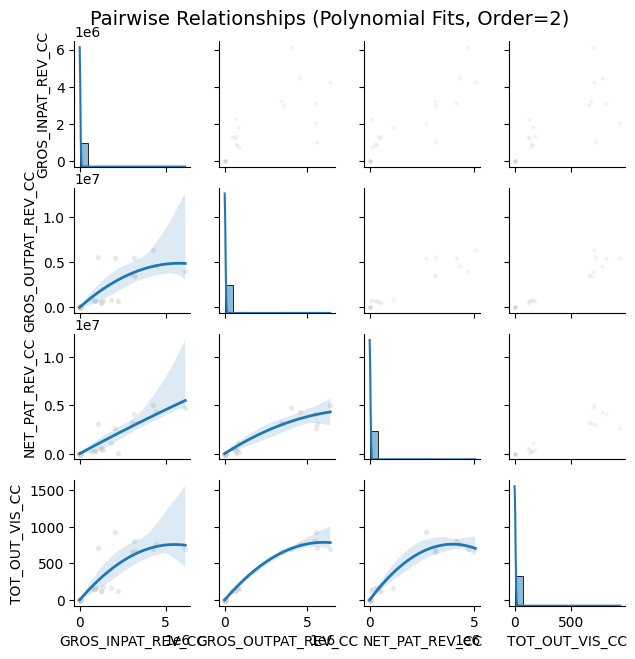

In [ ]:
# Your code here . . .
#sns.pairplot(report[0:2], kind='reg')
#plt.show()

# choose 4 numeric features from your file (swap if needed) (#CL9)
pair_cols = ["GROS_INPAT_REV_CC", "GROS_OUTPAT_REV_CC", "NET_PAT_REV_CC", "TOT_OUT_VIS_CC"]
sub = report[pair_cols].dropna()

g = sns.PairGrid(sub, diag_sharey=False, height=1.6)
g.map_lower(sns.regplot, order=2,
            scatter_kws={"color":"lightgrey", "alpha":0.4, "s":8},
            line_kws={"linewidth":2})
g.map_upper(sns.scatterplot, color="lightgrey", alpha=0.3, s=8)
g.map_diag(sns.histplot, kde=True)
g.fig.suptitle("Pairwise Relationships (Polynomial Fits, Order=2)", y=1.02, fontsize=14)
plt.show()

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

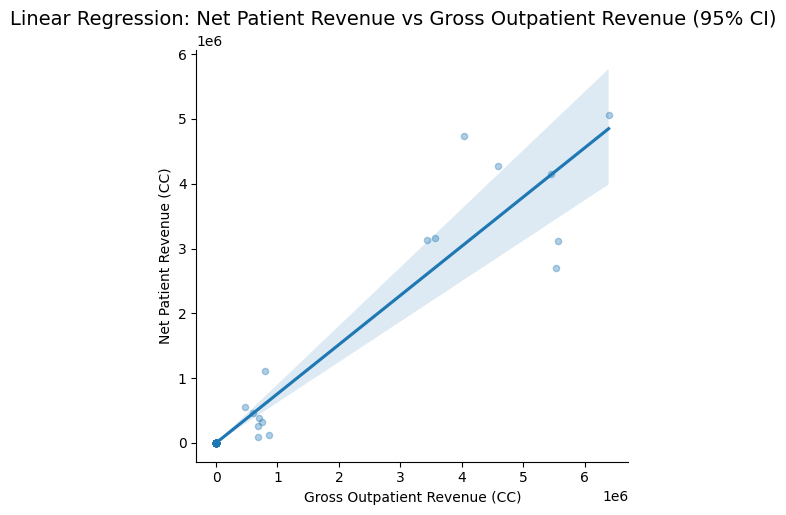

In [ ]:
# Your code here . . .

xcol, ycol = "GROS_OUTPAT_REV_CC", "NET_PAT_REV_CC"  # pick any two numeric columns
df2 = report[[xcol, ycol]].dropna()

g = sns.lmplot(data=df2, x=xcol, y=ycol,
               scatter_kws={"s":20, "alpha":0.35})  # (lectures use small, semi-transparent marks)
g.fig.suptitle("Linear Regression: Net Patient Revenue vs Gross Outpatient Revenue (95% CI)",
               y=1.02, fontsize=14)
plt.xlabel("Gross Outpatient Revenue (CC)")
plt.ylabel("Net Patient Revenue (CC)")
plt.show()

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

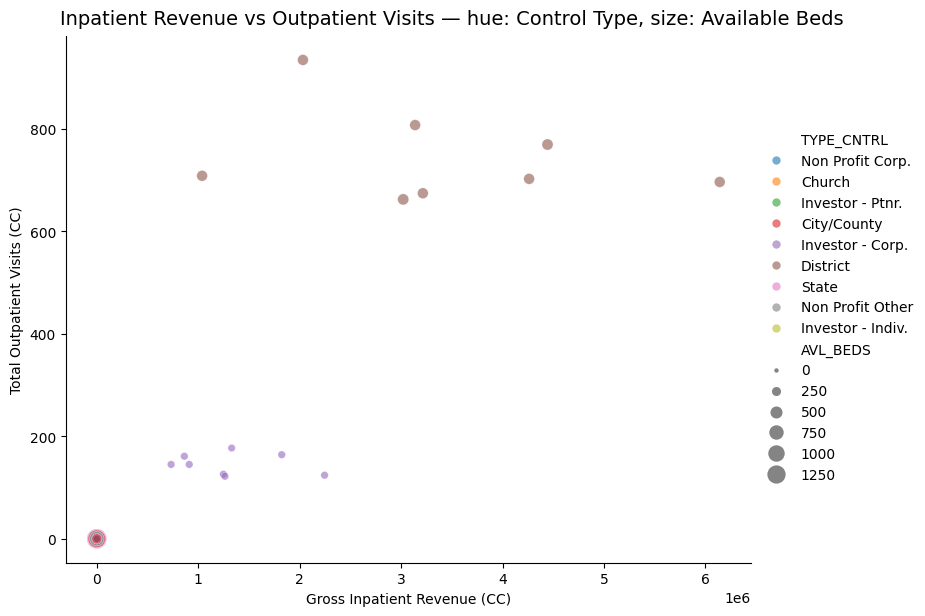

In [ ]:
# Your code here . . .

xcol, ycol  = "GROS_INPAT_REV_CC", "TOT_OUT_VIS_CC"
hue_col     = "TYPE_CNTRL"   # categorical
size_col    = "AVL_BEDS"     # numeric; use "LIC_BEDS" if you prefer

df3 = report[[xcol, ycol, hue_col, size_col]].dropna()

g = sns.relplot(data=df3, kind="scatter",
                x=xcol, y=ycol,
                hue=hue_col, size=size_col, sizes=(10, 200),
                alpha=0.6, height=6, aspect=1.3)
g.fig.suptitle("Inpatient Revenue vs Outpatient Visits — hue: Control Type, size: Available Beds",
               y=1.02, fontsize=14)
plt.xlabel("Gross Inpatient Revenue (CC)")
plt.ylabel("Total Outpatient Visits (CC)")
plt.show()

### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

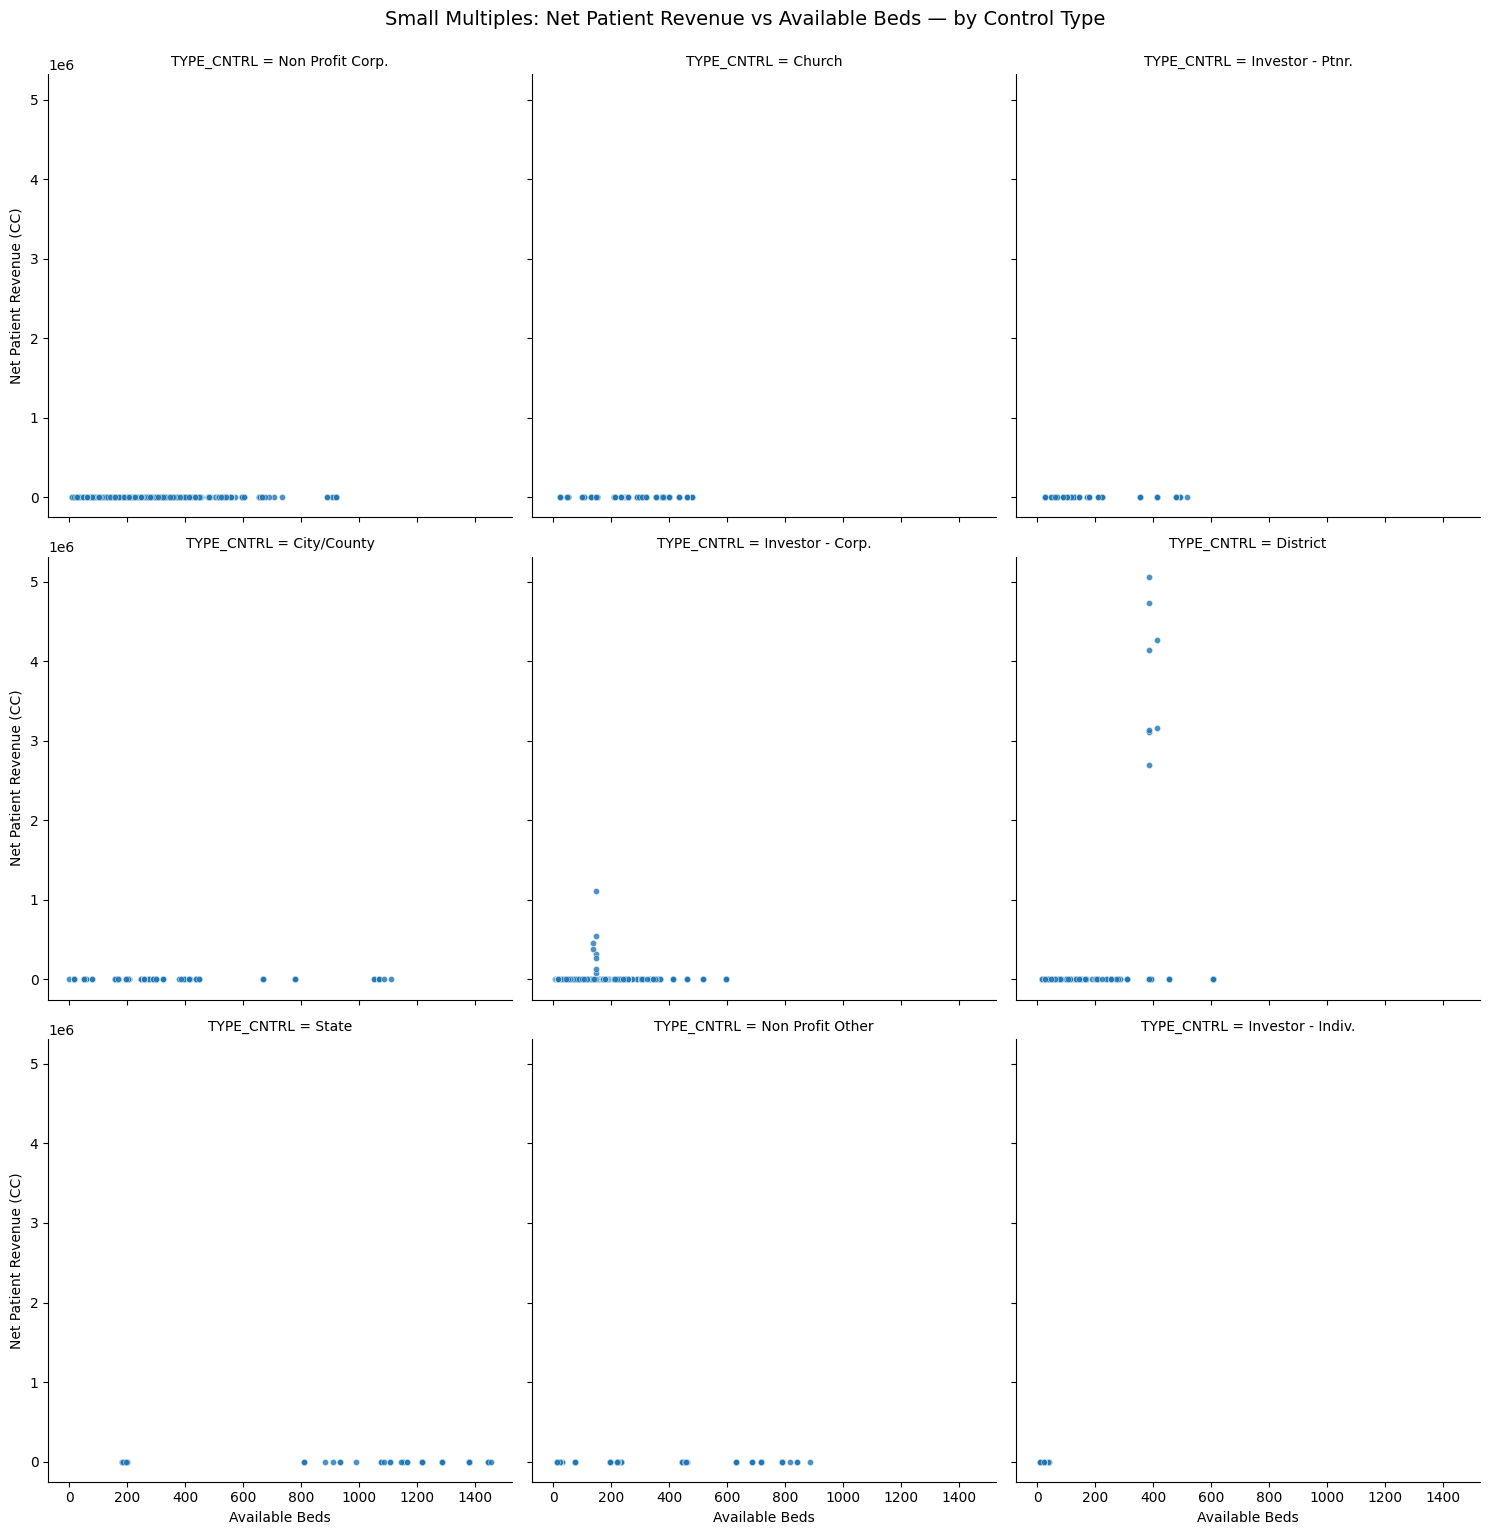

In [ ]:
# Your code here . . .


xcol, ycol = "AVL_BEDS", "NET_PAT_REV_CC"
facet_col  = "TYPE_CNTRL"  # single categorical facet

df4 = report[[xcol, ycol, facet_col]].dropna()

g = sns.relplot(data=df4, kind="scatter",
                x=xcol, y=ycol,
                col=facet_col, col_wrap=3,   # 3 plots per row
                height=5, s=20, alpha=0.8)   # height=5, fixed marker size=20

g.fig.suptitle("Small Multiples: Net Patient Revenue vs Available Beds — by Control Type",
               y=1.02, fontsize=14)
for ax in g.axes.flat:
    ax.set_xlabel("Available Beds")
    ax.set_ylabel("Net Patient Revenue (CC)")
plt.show()